In [1]:
# Imports - run first
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import dz

samples_published = dz.load_all()

# Load in new samples from CSVs
samples_new = []
folder = 'Garcia_Samples/'
for file in os.listdir(folder):
    data = pd.read_csv(folder+file)
    name = file.split('.')[0]
    sample = dz.DZSample(name=name,agedata=data)
    sample.bestage = sample.agedata['Best Age']
    samples_new.append(sample)
    sample.color='blue'


samples = samples_published + samples_new

def plot_fault_block(names,save=False,filename=None):
    smps = [smp for smp in samples if smp.name in names]
    
    nplots = len(names)
    height = nplots*2
    
    fig,axs = plt.subplots(nplots,sharex=True,dpi=300,figsize=(8.5,height))
    
    if len(names)==1:
        smp = smps[0]
        smp.kde(ax=axs)
        axs.set_title(smp.name)
        axs.set_xlim(100,4000)
    
    else:
        for k,smp in enumerate(smps):
            smp.kde(ax=axs[k])
            axs[k].set_title(smp.name)
            axs[k].set_xlim(100,4000)

    plt.tight_layout()
    
    if save == True:
        fig.savefig(filename)
    
    return(smps)

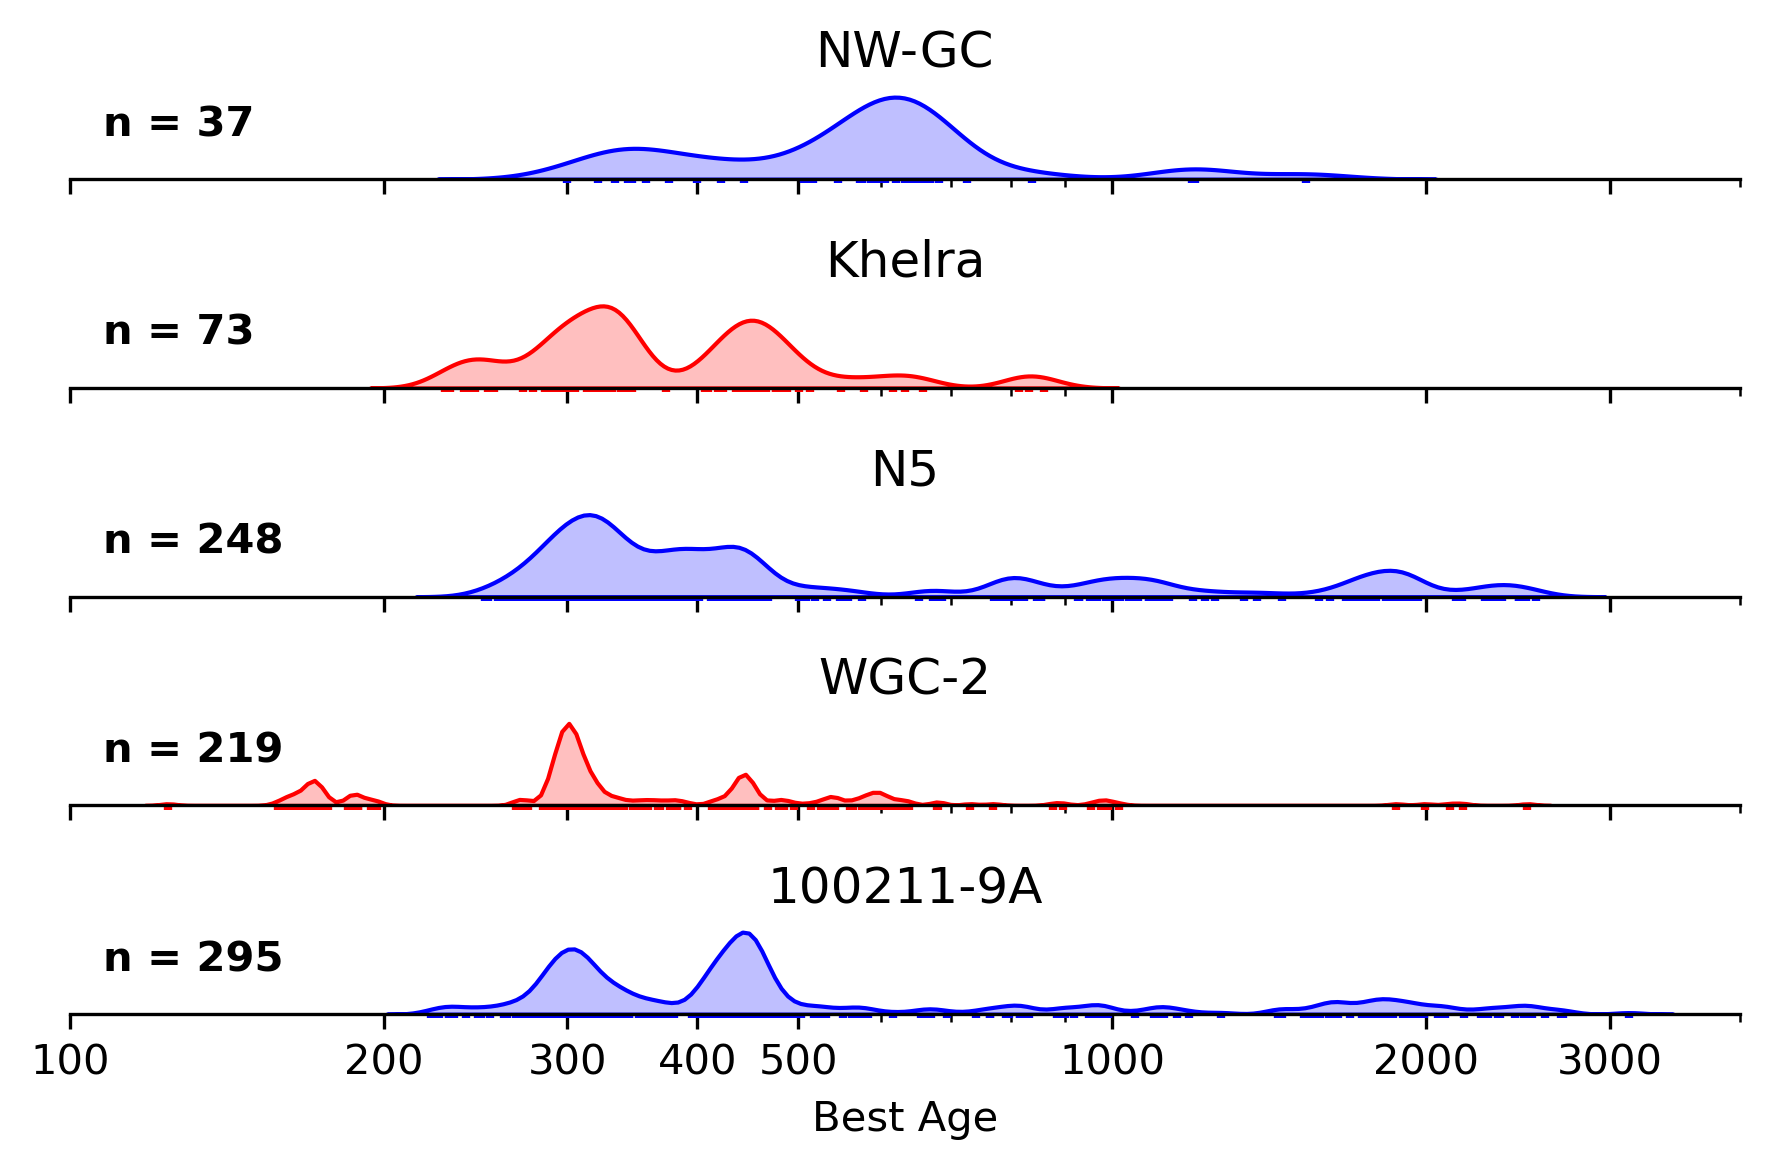

In [2]:
dizi_names = ['NW-GC','N5','Khelra','WGC-2','100211-9A']

dizi_samples = plot_fault_block(dizi_names,save=True,filename='dizi_block.pdf')


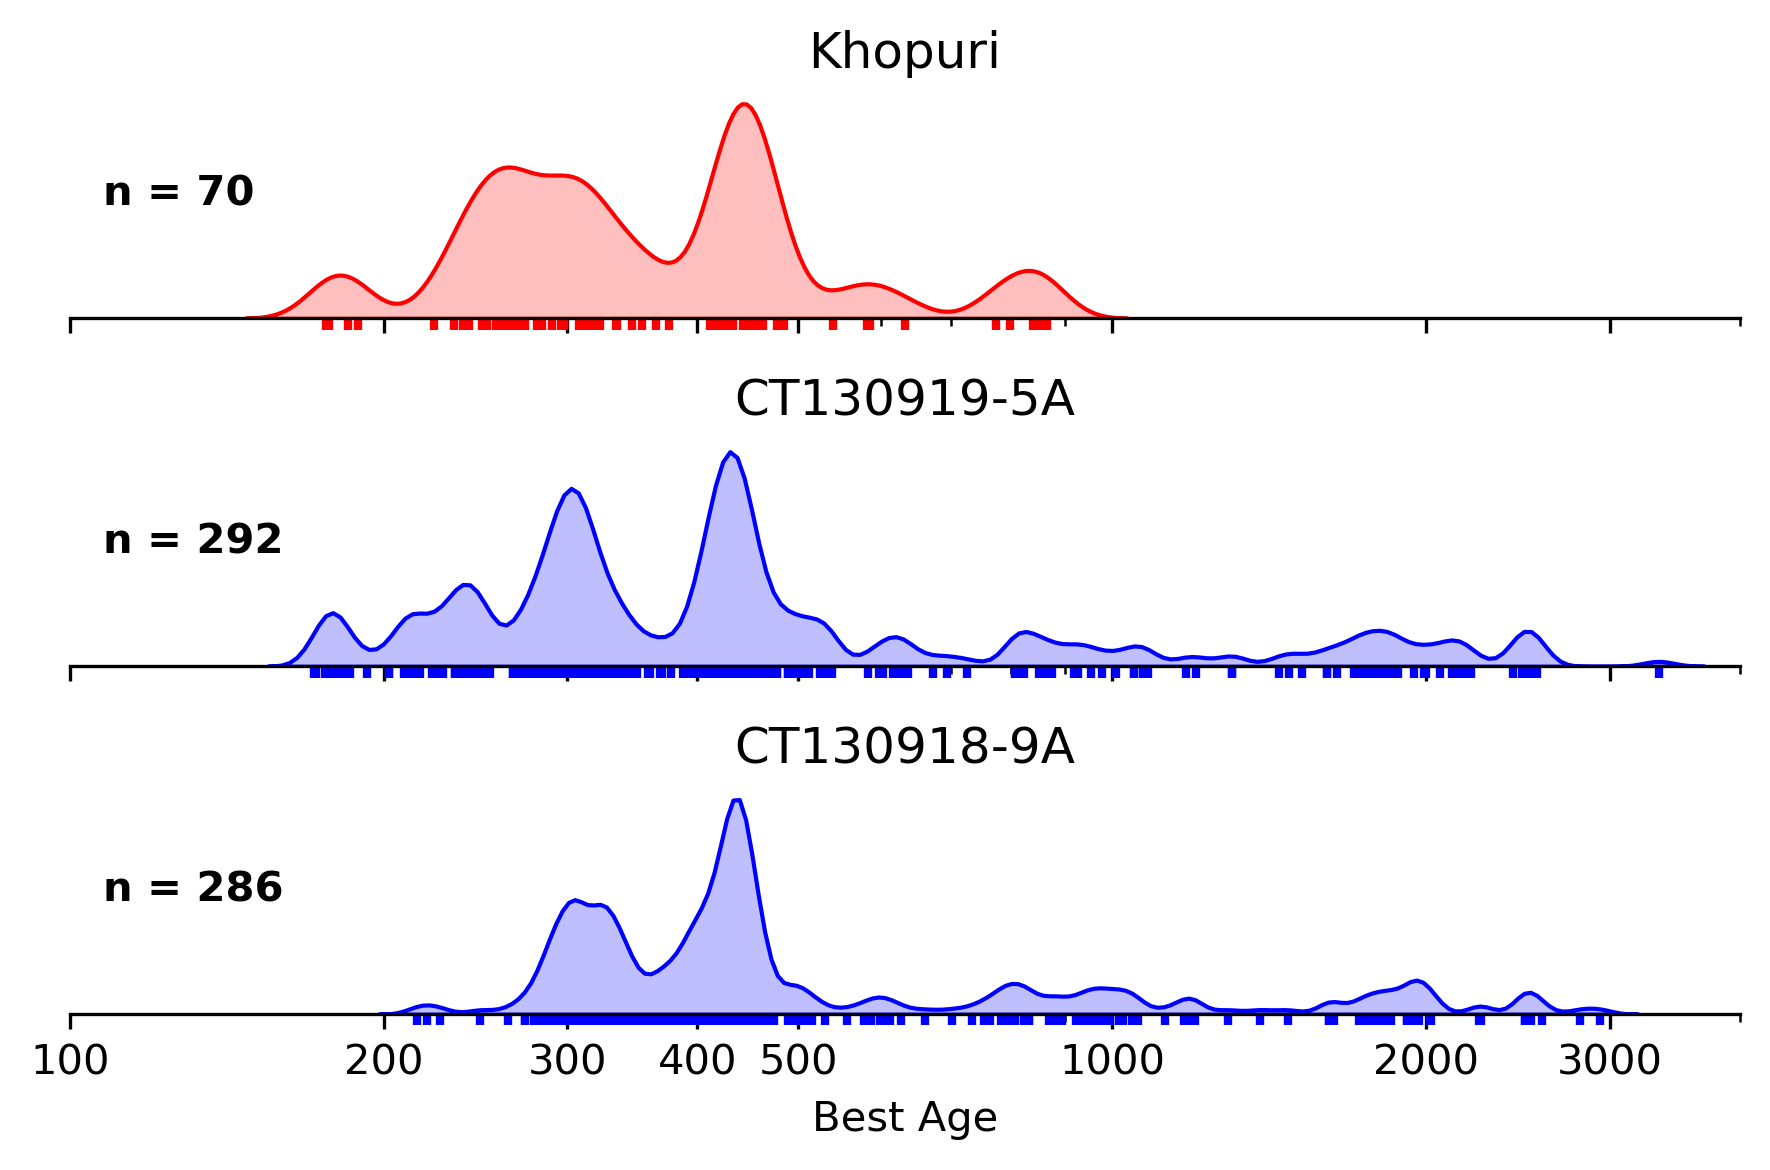

In [3]:
idliani_names = ['Khopuri','CT130918-9A','CT130919-5A']

plot_fault_block(idliani_names,save=True,filename='idliani_block.pdf')

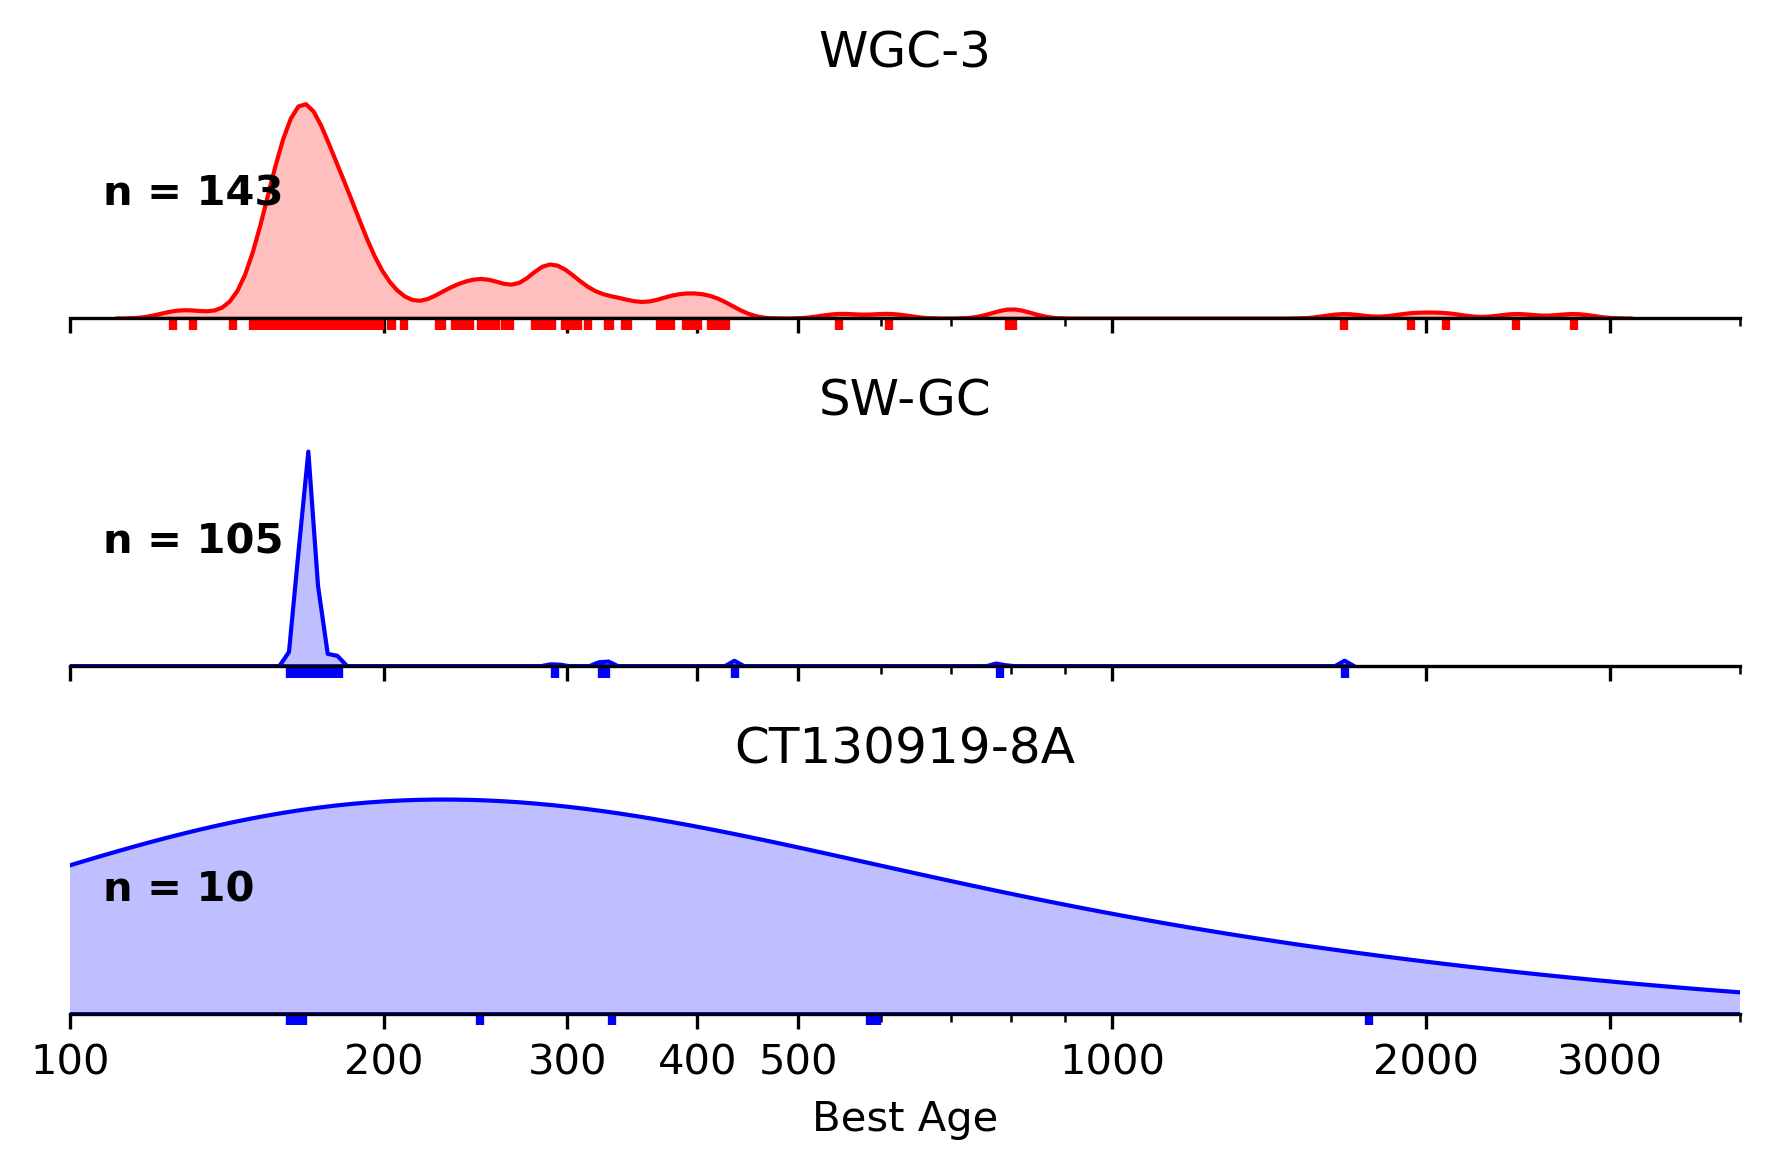

In [4]:
jvari_names = ['SW-GC','WGC-3','CT130919-8A']

plot_fault_block(jvari_names,save=True,filename='jvari_block.pdf')